In [240]:
#basic libraries
import pandas as pd
import numpy as np

#processing and model selection
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold

#models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

#evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [212]:
#loading the dataset
df = pd.read_csv("C:\\Users\\Eemaan\\Downloads\\Covid Dataset.csv")

In [213]:
df

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,...,Yes,Yes,No,No,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,...,Yes,No,No,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,No


In [214]:
df.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [215]:
missing_values = df.isnull().sum()

In [216]:
missing_values

Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Running Nose                               0
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
Wearing Masks                              0
Sanitization from Market                   0
COVID-19                                   0
dtype: int64

In [217]:
df.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

In [218]:
#to remove any whitespaces in the beginning or ending 
df.columns = df.columns.str.strip()

In [219]:
df.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue',
       'Gastrointestinal', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

In [220]:
#initialize the label encoder 
label_encoder = LabelEncoder()
#transforming data from yes/no to 0/1
df_encoded = df.apply(label_encoder.fit_transform)

In [221]:
df_encoded.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1


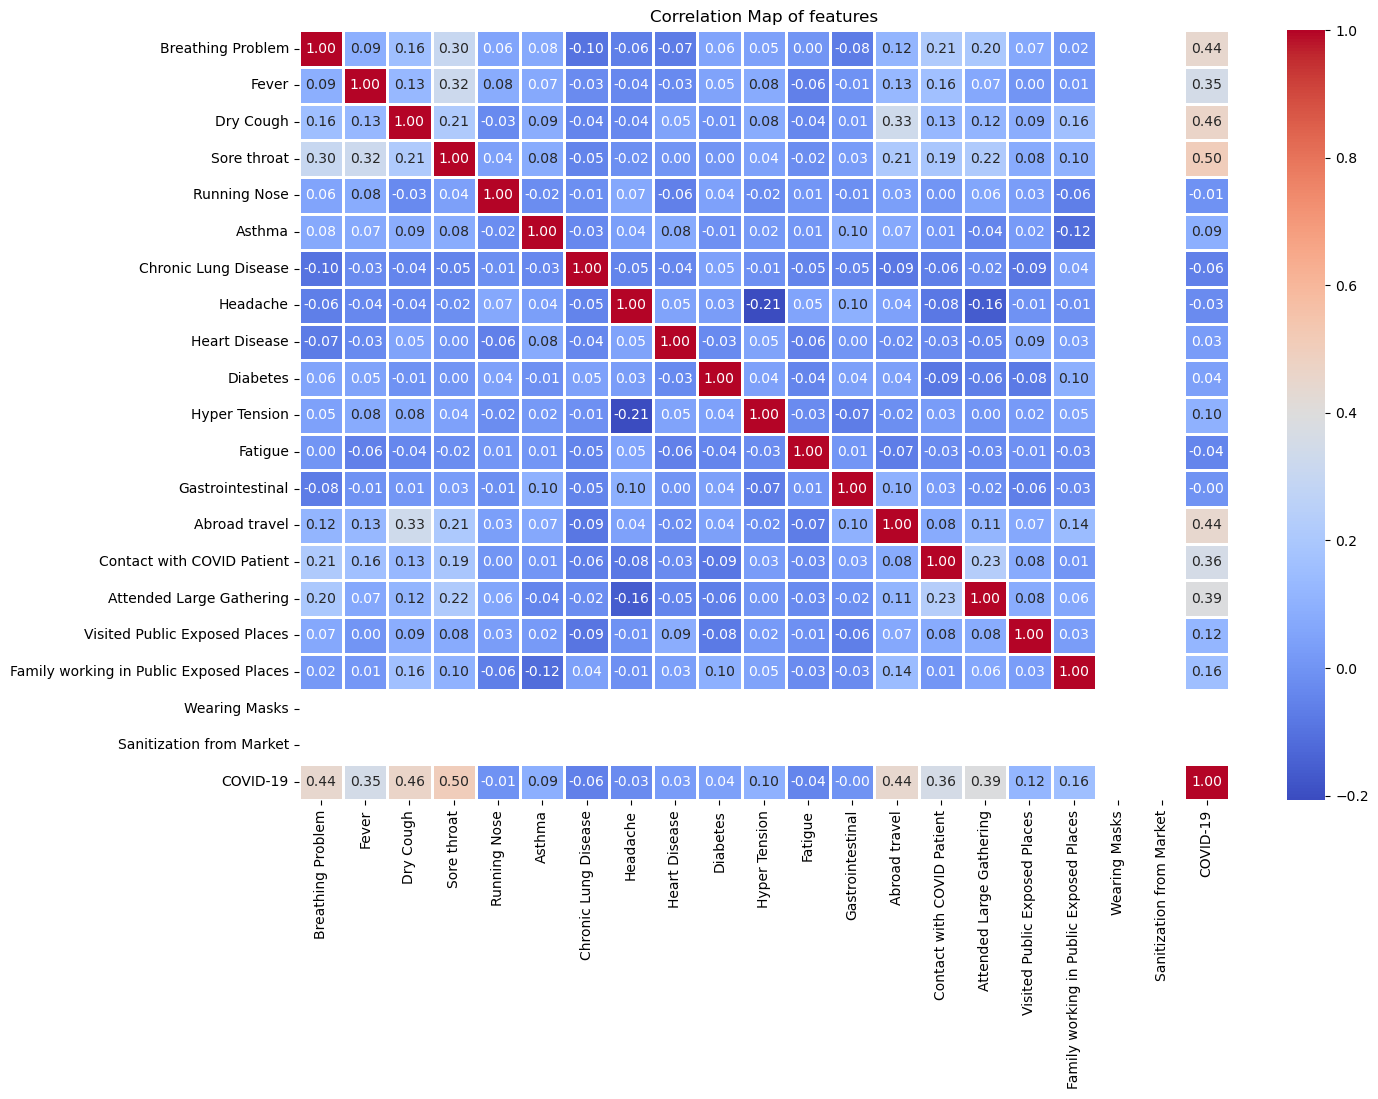

In [242]:
#calculating the correlation matrix
corr_matrix = df_encoded.corr()
#plotting heatmap of correlation
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths = 1)
plt.title("Correlation Map of features")
plt.show()

In [223]:
# checking why last two columns aint providing values
# Check for unique values in the 'Wearing Masks' and 'Sanitization from Market' columns
print("Unique values in 'Wearing Masks':", df_encoded['Wearing Masks'].unique())
print("Unique values in 'Sanitization from Market':", df_encoded['Sanitization from Market'].unique())
# Check value counts for both features
print("\nValue counts for 'Wearing Masks':\n", df_encoded['Wearing Masks'].value_counts())
print("\nValue counts for 'Sanitization from Market':\n", df_encoded['Sanitization from Market'].value_counts())

Unique values in 'Wearing Masks': [0]
Unique values in 'Sanitization from Market': [0]

Value counts for 'Wearing Masks':
 Wearing Masks
0    5434
Name: count, dtype: int64

Value counts for 'Sanitization from Market':
 Sanitization from Market
0    5434
Name: count, dtype: int64


In [224]:
#As the correlation matrix aint providing values for wearing masks and sanitation from the market because of constant values
#Omitting these and the gastrointestinal column because of its low effect
omit_columns = ['Gastrointestinal','Wearing Masks', 'Sanitization from Market']
df_omitted = df_encoded.drop(columns = omit_columns)

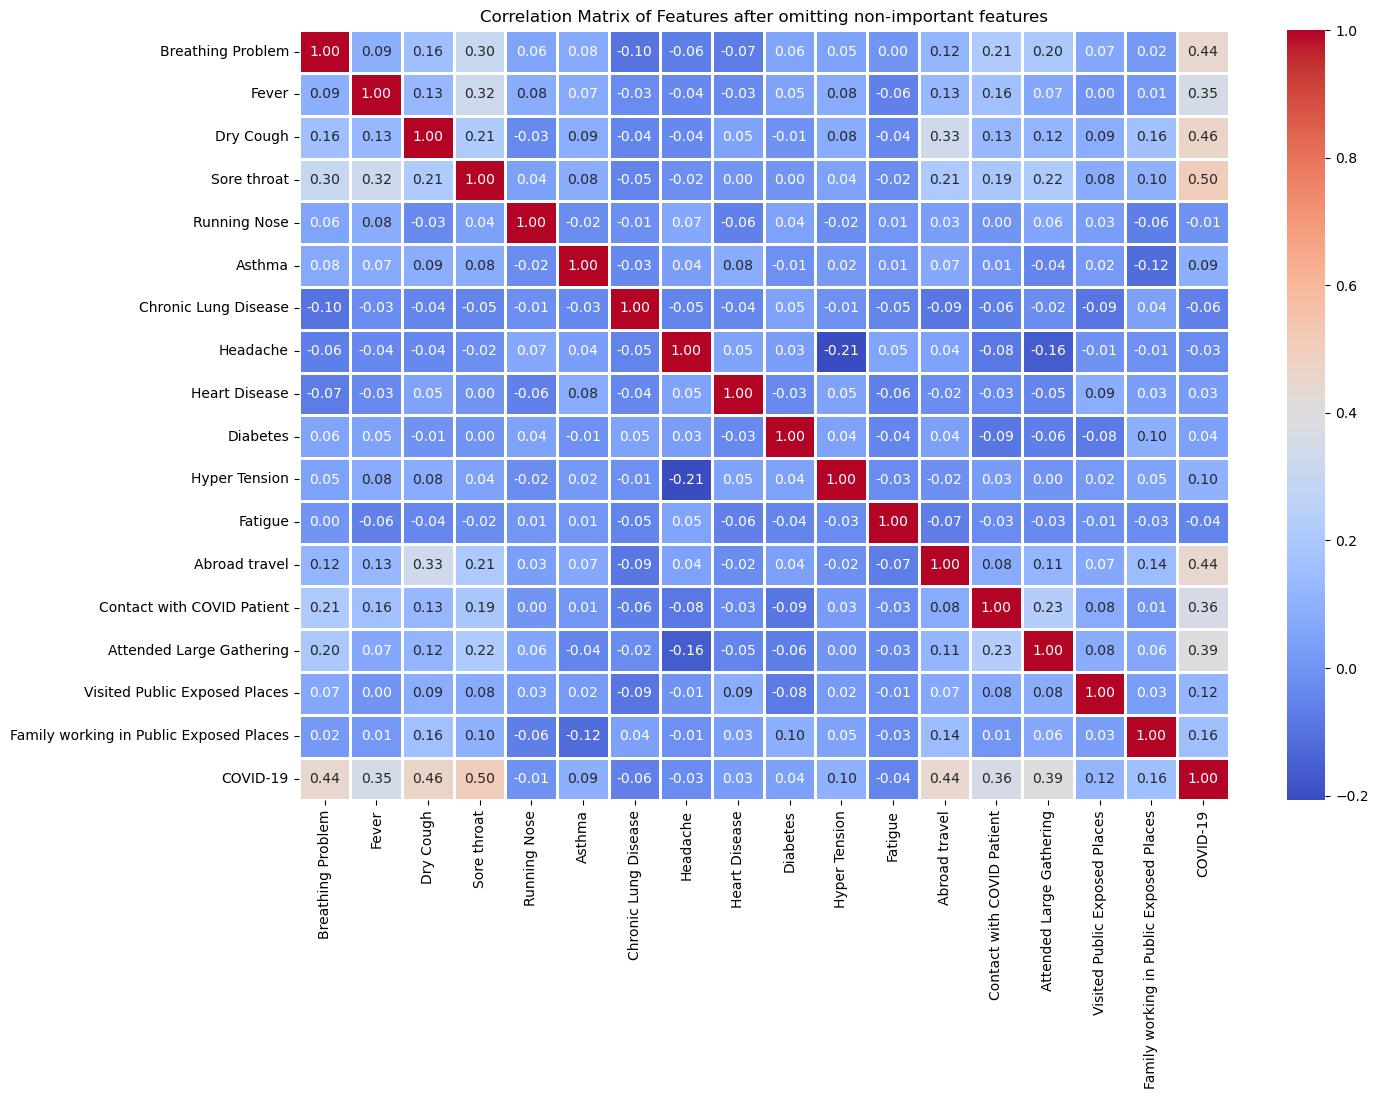

In [225]:
corr_matrix_after = df_omitted.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr_matrix_after, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title("Correlation Matrix of Features after omitting non-important features")
plt.show()

In [226]:
#Splitting data in X and Y features
X = df_encoded.drop(columns = ['COVID-19'])
Y = df_encoded['COVID-19']

In [227]:
#Initialize the standard scaler
scaler = StandardScaler()
#Fit scaler on X and transform
X_scaled = scaler.fit_transform(X)

In [243]:
#Split the dataset into training (70%), testing (20%), and validation (10%) sets
X_train, X_temp, Y_train, Y_temp = train_test_split(X_scaled, Y, test_size=0.25, random_state=42, stratify=Y)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.25, random_state=42, stratify=Y_temp)

In [244]:
#Initialize the models
log_model = LogisticRegression()
knn_model = KNeighborsClassifier()

In [245]:
#Train the model
log_model.fit(X_train, Y_train)
# Feature importance
feature_importance = pd.Series(log_model.coef_[0], index=X.columns).sort_values(ascending=False)

In [246]:
#display feature importance for logistic regression
print("Feature Importance for Symptoms (Logistic Regression):",feature_importance)

Feature Importance for Symptoms (Logistic Regression): Attended Large Gathering                   4.071234
Abroad travel                              3.648921
Fever                                      1.730167
Sore throat                                1.634838
Dry Cough                                  1.499229
Breathing Problem                          1.359845
Contact with COVID Patient                 0.973572
Family working in Public Exposed Places    0.513817
Diabetes                                   0.164605
Chronic Lung Disease                       0.062924
Gastrointestinal                           0.036470
Wearing Masks                              0.000000
Sanitization from Market                   0.000000
Fatigue                                   -0.028830
Headache                                  -0.110701
Asthma                                    -0.114057
Hyper Tension                             -0.115038
Heart Disease                             -0.163337
Visited P

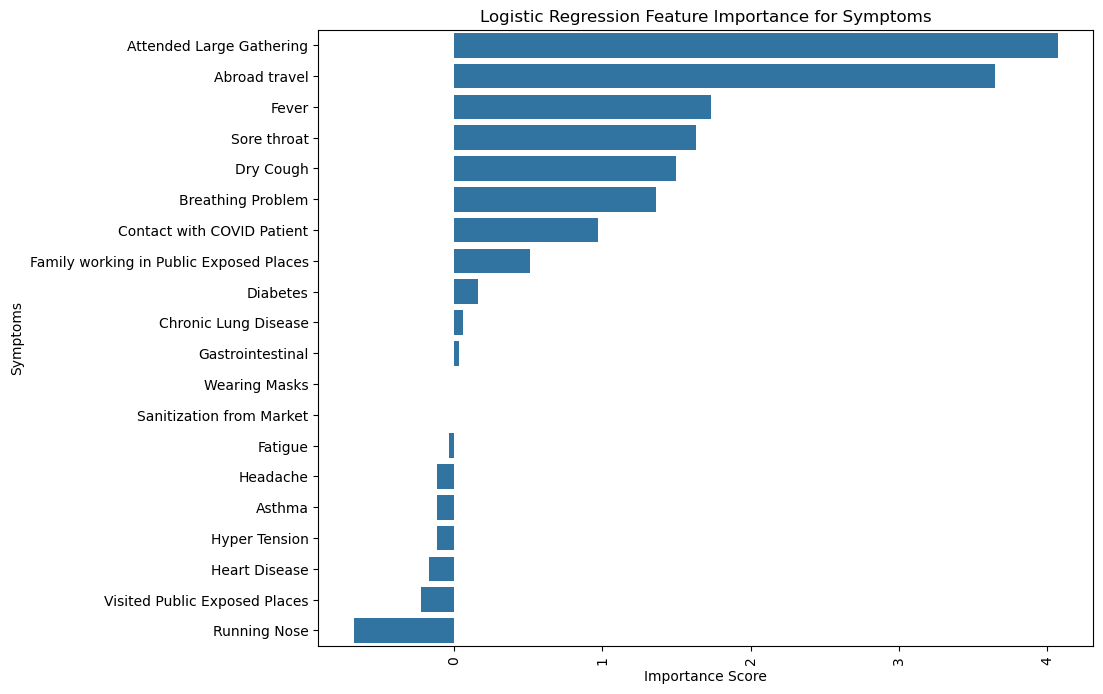

In [256]:
#plot the feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.xticks(rotation=90)
plt.title("Logistic Regression Feature Importance for Symptoms")
plt.xlabel("Importance Score")
plt.ylabel("Symptoms")
plt.show()

In [248]:
# Fit KNN on training data if not already done
knn_model.fit(X_train, Y_train)
# Calculate permutation importance
result = permutation_importance(knn_model, X_val, Y_val, n_repeats=10, random_state=42)
# Plot permutation importance
feature_importance_knn = pd.Series(result.importances_mean, index=X.columns).sort_values(ascending=False)

In [249]:
#display feature importance
print("Permutation Importance for Symptoms (KNN):",feature_importance_knn)

Permutation Importance for Symptoms (KNN): Abroad travel                              0.015113
Dry Cough                                  0.010991
Fever                                      0.002846
Breathing Problem                          0.002061
Heart Disease                              0.000491
Running Nose                               0.000294
Headache                                   0.000196
Diabetes                                   0.000000
Wearing Masks                              0.000000
Sanitization from Market                   0.000000
Asthma                                     0.000000
Sore throat                               -0.000196
Fatigue                                   -0.000491
Attended Large Gathering                  -0.000491
Chronic Lung Disease                      -0.000589
Visited Public Exposed Places             -0.000687
Family working in Public Exposed Places   -0.000981
Contact with COVID Patient                -0.001668
Gastrointestinal     

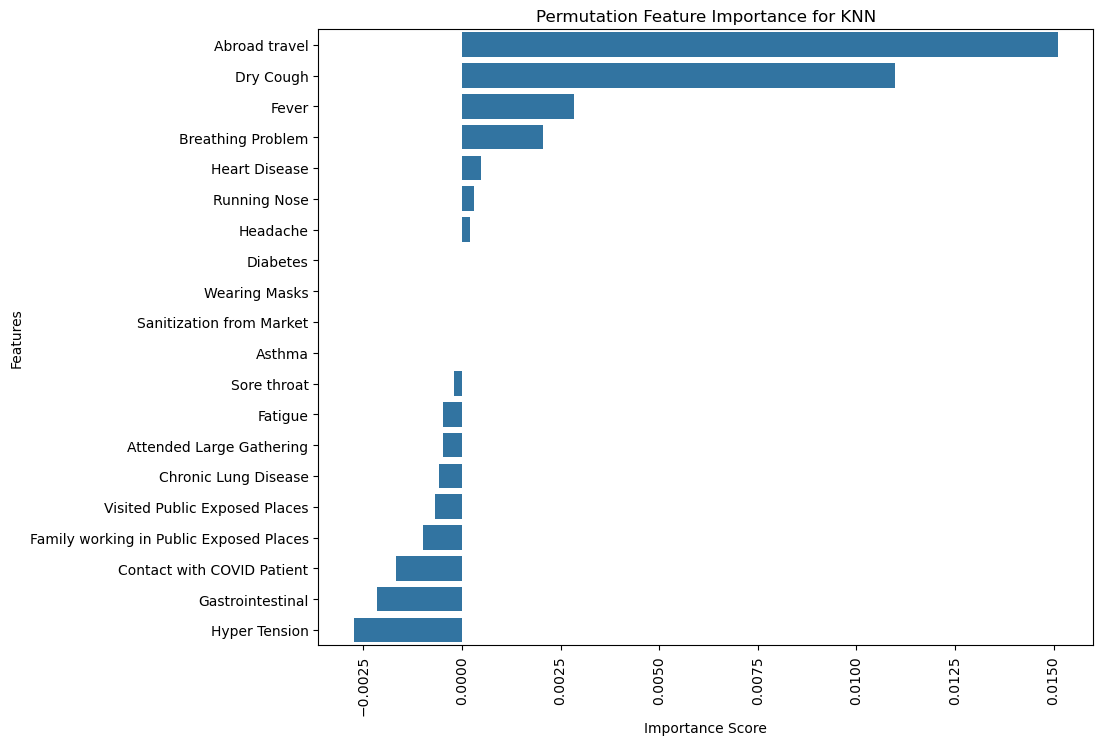

In [257]:
#plot the permutation feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importance_knn.values, y=feature_importance_knn.index)
plt.xticks(rotation=90)
plt.title("Permutation Feature Importance for KNN")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [251]:
# Set up k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [252]:
# List of models to evaluate
models = {
    "Logistic Regression": log_model,
    "K-Nearest Neighbors": knn_model
}

In [253]:
# Perform cross-validation and store results
cv_scores = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    cv_scores[model_name] = scores
    print(f"{model_name} - Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")

Logistic Regression - Accuracy: 0.9688 (+/- 0.0083)
K-Nearest Neighbors - Accuracy: 0.9760 (+/- 0.0047)


Logistic Regression - Accuracy: 0.9666, Precision: 0.9747, Recall: 0.9842, F1-score: 0.9794


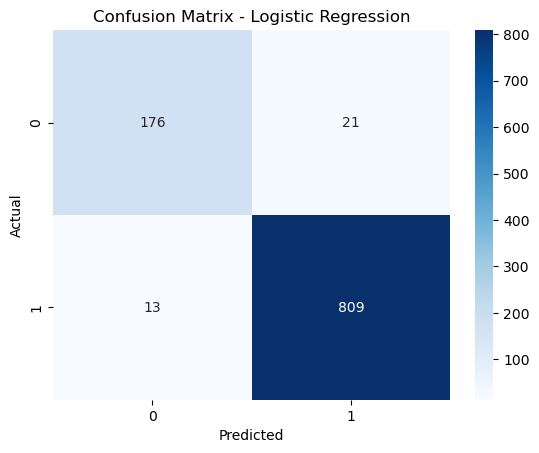

K-Nearest Neighbors - Accuracy: 0.9745, Precision: 0.9950, Recall: 0.9732, F1-score: 0.9840


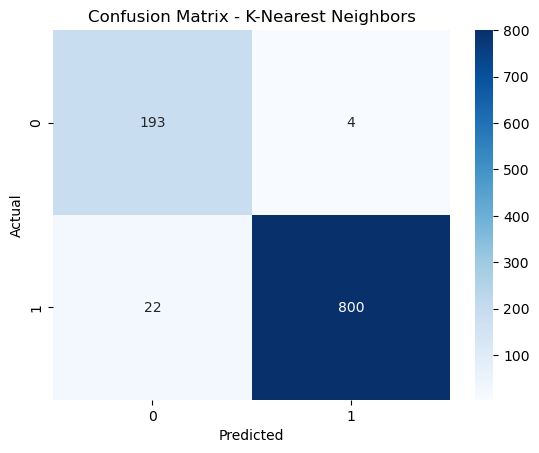

In [258]:
# Initialize a dictionary to store results for each model
results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}
# Loop through models to train, predict, and record metrics
for model_name, model in models.items():
    # Predict on validation set
    Y_prediction = model.predict(X_val)
    # Calculate evaluation metrics
    accuracy = accuracy_score(Y_val, Y_prediction)
    precision = precision_score(Y_val, Y_prediction)
    recall = recall_score(Y_val, Y_prediction)
    f1 = f1_score(Y_val, Y_prediction) 
    # Append the results for the current model to the results dictionary
    results["Model"].append(model_name)
    results["Accuracy"].append(accuracy)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)
    # Print the metrics for the current model
    print(f"{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
    # Plot confusion matrix
    cm = confusion_matrix(Y_val, Y_prediction)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


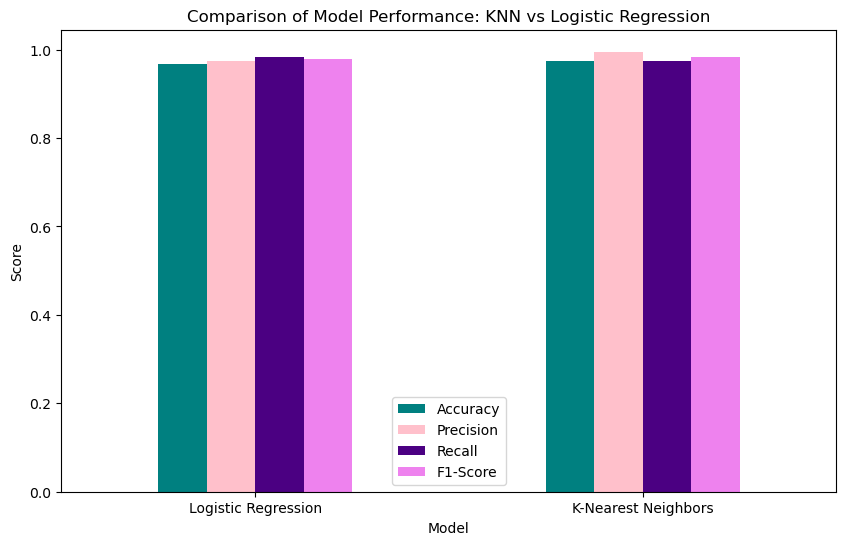

In [255]:
# Convert results to DataFrame for easier viewing and plotting
comparison_df = pd.DataFrame(results)
comparison_df.set_index('Model').plot(kind='bar', figsize=(10, 6), color=['teal', 'pink', 'indigo', 'violet'])
plt.title("Comparison of Model Performance: KNN vs Logistic Regression")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()